In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

\

In [70]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving crime_data.csv to crime_data (3).csv
User uploaded file "crime_data (3).csv" with length 1442 bytes


In [71]:
# Load data
df = pd.read_csv('crime_data.csv')
df.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
df

,State,crime$cluster,Murder,Assault,UrbanPop,Rape
0,Alabama,4,13.2,236,58,21.2
1,Alaska,4,10.0,263,48,44.5
2,Arizona,4,8.1,294,80,31.0
3,Arkansas,3,8.8,190,50,19.5
4,California,4,9.0,276,91,40.6
5,Colorado,3,7.9,204,78,38.7
6,Connecticut,2,3.3,110,77,11.1
7,Delaware,4,5.9,238,72,15.8
8,Florida,4,15.4,335,80,31.9
9,Georgia,3,17.4,211,60,25.8


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          50 non-null     object 
 1   crime$cluster  50 non-null     int64  
 2   Murder         50 non-null     float64
 3   Assault        50 non-null     int64  
 4   UrbanPop       50 non-null     int64  
 5   Rape           50 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ KB


In [41]:
df.describe()

,crime$cluster,Murder,Assault,UrbanPop,Rape
count,50.000000,50.00000,50.000000,50.000000,50.000000
mean,2.720000,7.78800,170.760000,65.540000,21.232000
std,1.125584,4.35551,83.337661,14.474763,9.366385
min,1.000000,0.80000,45.000000,32.000000,7.300000
25%,2.000000,4.07500,109.000000,54.500000,15.075000
50%,3.000000,7.25000,159.000000,66.000000,20.100000
75%,4.000000,11.25000,249.000000,77.750000,26.175000
max,4.000000,17.40000,337.000000,91.000000,46.000000


In [42]:
df.columns = df.columns.str.strip()

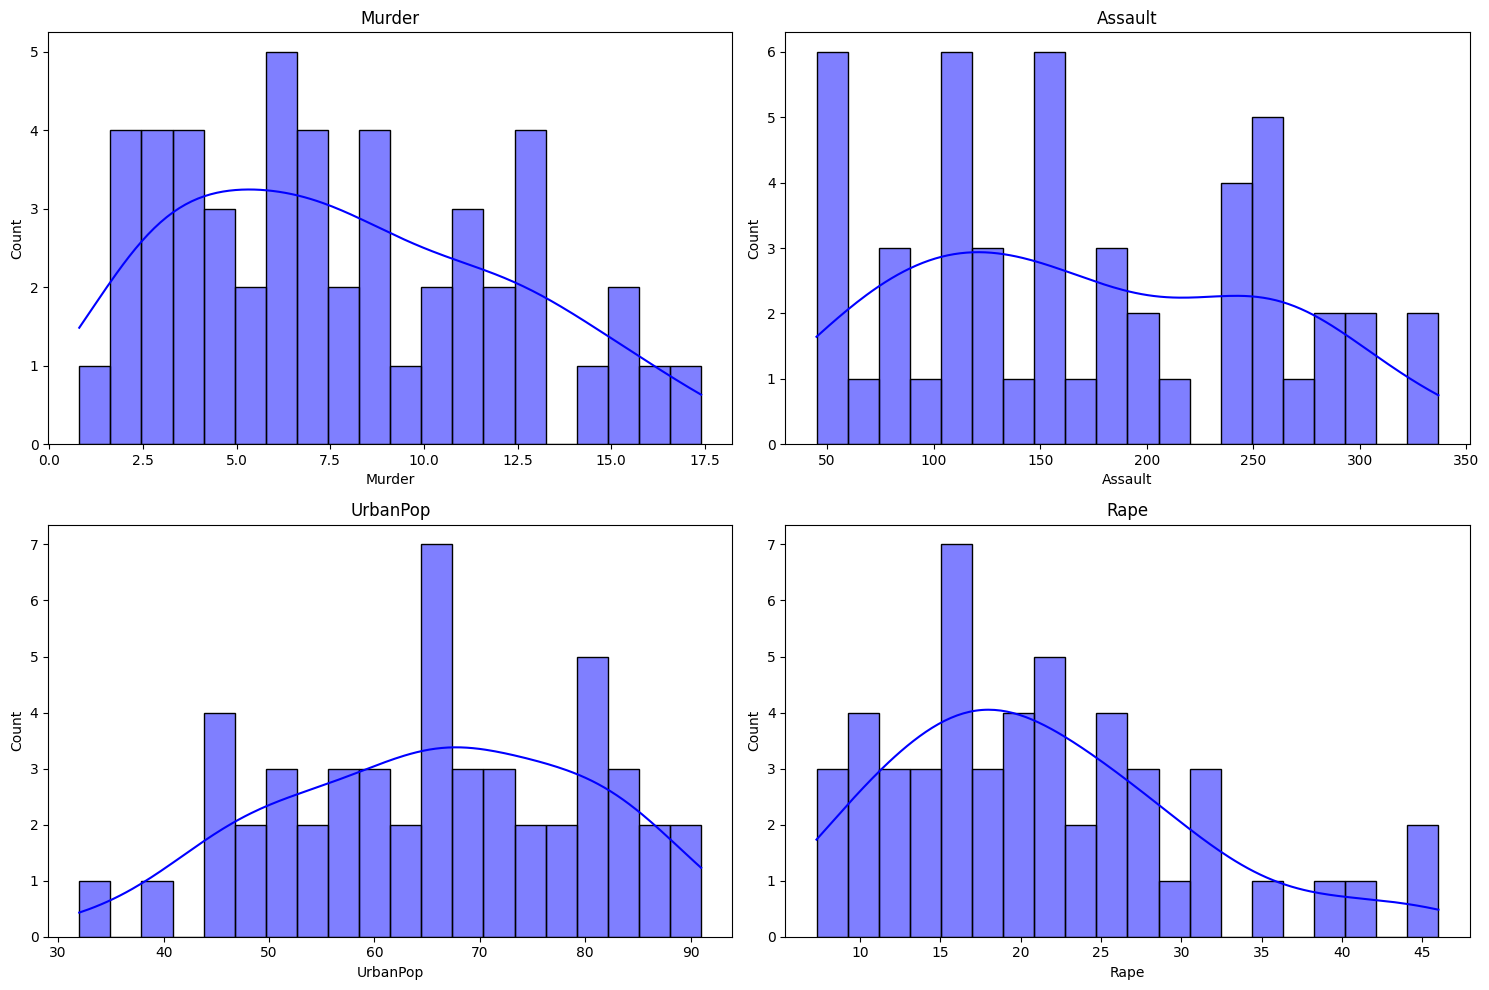

In [47]:
import seaborn as sns  # estetika
import matplotlib.pyplot as plt  # menampilkan plot

# kolom yang akan divisualisasikan ke histogram
kolom_1 = ['Murder', 'Assault', 'UrbanPop', 'Rape']

plt.figure(figsize=(15, 10))  # Mengatur ukuran figure biar besar


for i, column in enumerate(kolom_1, 1):
    plt.subplot(2, 2, i)  # Membuat grid 2x2 menampilkan semua histogram dalam satu figure
    sns.histplot(df[column], kde=True, bins=20, color='blue')  # Membuat histogram dengan 20 bin
    plt.title(column)  # Menampilkan judul untuk masing-masing histogram sesuai nama kolom

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()  # Menampilkan plot


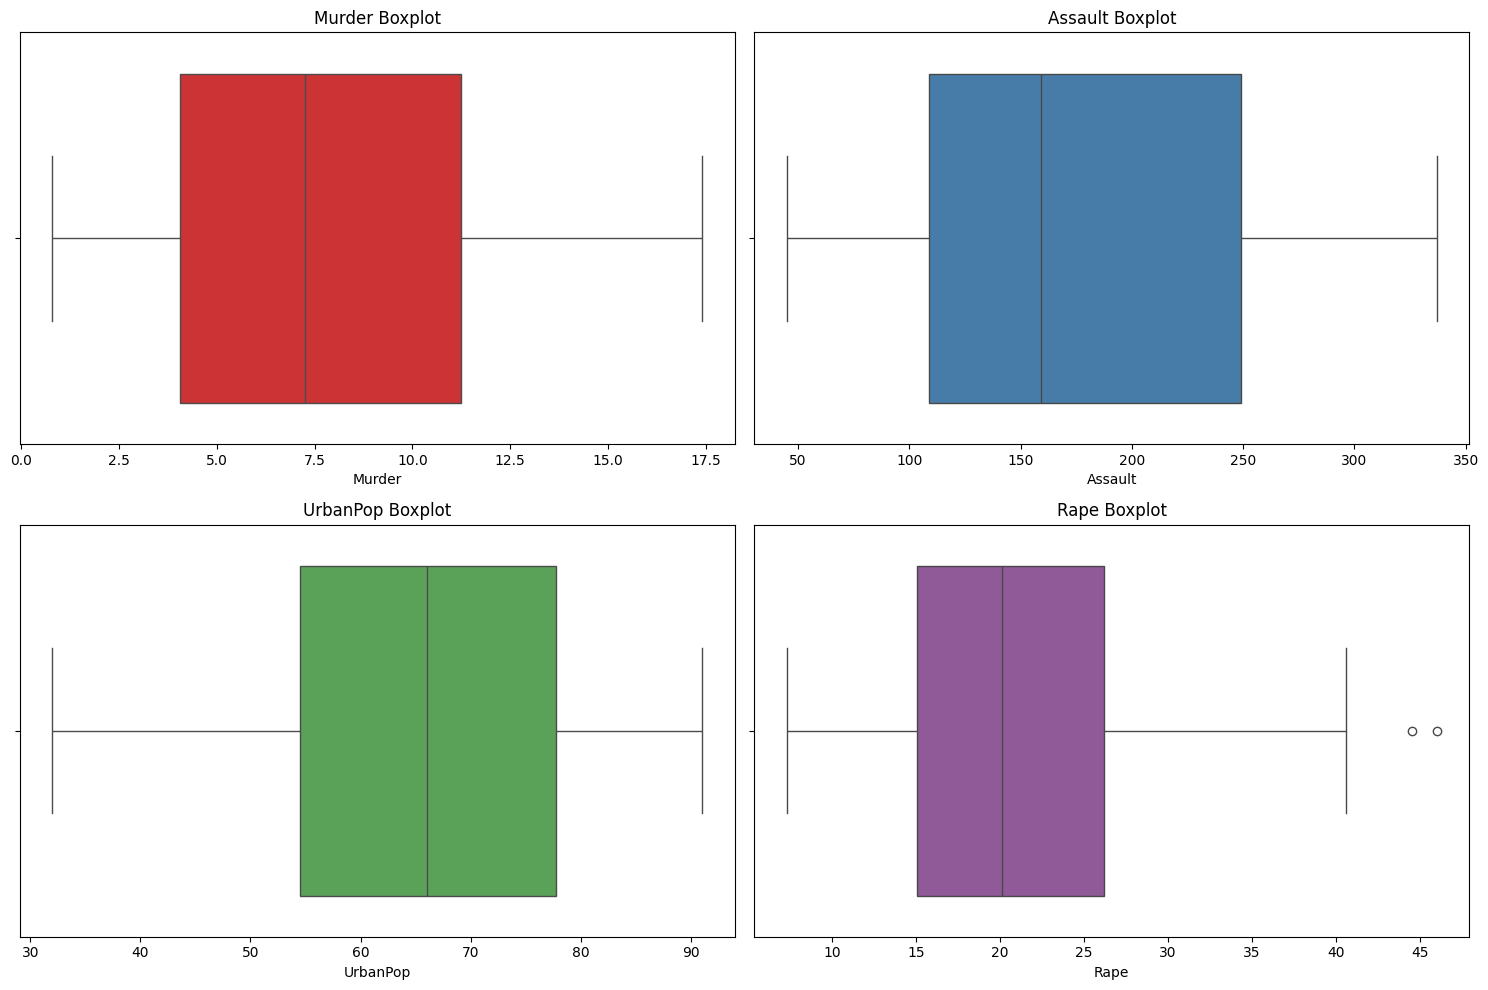

In [48]:
# Daftar kolom yang akan divisualisasikan dalam bentuk boxplot
kolom_2 = ['Murder', 'Assault', 'UrbanPop', 'Rape']

# Membuat palet warna menggunakan Seaborn dengan skema "Set1"
color_palette = sns.color_palette("Set1", len(kolom_2))

plt.figure(figsize=(15, 10))  # Mengatur ukuran figure agar lebih besar dan mudah dibaca

# Looping untuk membuat boxplot dari setiap kolom dalam 'kolom_2'
for i, column in enumerate(kolom_2, 1):
    plt.subplot(2, 2, i)  # Membuat grid 2x2 untuk menampilkan semua boxplot dalam satu figure
    sns.boxplot(data=df, x=column, color=color_palette[i - 1])  # Membuat boxplot dengan warna dari color_palette
    plt.xlabel(column)  # Memberikan label pada sumbu X
    plt.title(f'{column} Boxplot')  # Menambahkan judul untuk setiap boxplot

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()  # Menampilkan plot


<Figure size 1000x700 with 0 Axes>

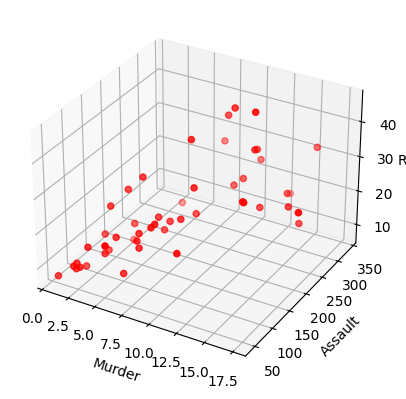

In [50]:
# Mengimpor modul untuk visualisasi 3D
from mpl_toolkits.mplot3d import Axes3D

# Mengatur ukuran figure agar lebih besar dan mudah dibaca
plt.figure(figsize=(10, 7))

# Membuat objek figure dan menambahkan subplot dengan proyeksi 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Mendefinisikan sumbu X, Y, dan Z berdasarkan data dari dataset
x = df['Murder']   # Sumbu X mewakili jumlah pembunuhan (Murder)
y = df['Assault']  # Sumbu Y mewakili jumlah serangan (Assault)
z = df['Rape']     # Sumbu Z mewakili jumlah pemerkosaan (Rape)

# Membuat scatter plot dalam ruang 3D
ax.scatter(x, y, z, c='r', marker='o')  # Titik berwarna merah ('r') dengan marker berbentuk bulat ('o')

# Menambahkan label untuk setiap sumbu
ax.set_xlabel('Murder')   # Label untuk sumbu X
ax.set_ylabel('Assault')  # Label untuk sumbu Y
ax.set_zlabel('Rape')     # Label untuk sumbu Z

# Menampilkan plot 3D
plt.show()


In [52]:
import plotly.graph_objs as go  # Mengimpor Plotly untuk visualisasi interaktif dalam 3D

# Membuat scatter plot 3D menggunakan Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=df['Murder'],   # Sumbu X: jumlah pembunuhan
    y=df['Assault'],  # Sumbu Y: jumlah penyerangan
    z=df['Rape'],     # Sumbu Z: jumlah pemerkosaan
    mode='markers'    # Menampilkan data sebagai titik (scatter plot)
)])

# Menambahkan label untuk setiap sumbu dalam grafik 3D
fig.update_layout(
    scene=dict(
        xaxis_title='Murder',   # Label sumbu X
        yaxis_title='Assault',  # Label sumbu Y
        zaxis_title='Rape'      # Label sumbu Z
    )
)

# Menampilkan plot interaktif
fig.show()


In [54]:
from sklearn.cluster import KMeans  # Mengimpor K-Means untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor Silhouette Score untuk mengevaluasi clustering
import matplotlib.pyplot as plt  # Mengimpor Matplotlib untuk visualisasi

wcss = []   # List untuk menyimpan nilai WCSS (Within-Cluster Sum of Squares), yang mengukur seberapa baik titik dalam satu cluster
scores = [] # List untuk menyimpan nilai Silhouette Score, yang mengukur kualitas pemisahan antar cluster

for i in range(2, 10):  # Looping untuk mencoba jumlah cluster dari 2 hingga 9
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)  # Membuat model K-Means dengan jumlah cluster yang berbeda
    km.fit(df_train)  # Melatih model dengan data yang telah dipilih
    wcss.append(km.inertia_)  # Menyimpan nilai WCSS untuk jumlah cluster saat ini

    labels = km.labels_  # Mendapatkan label cluster dari hasil clustering
    silhouette_avg = silhouette_score(df_train, labels)  # Menghitung Silhouette Score untuk menilai kualitas cluster
    scores.append(silhouette_avg)  # Menyimpan nilai Silhouette Score

    print(f'WCSS untuk n_clusters={i}: {wcss[-1]}')  # Menampilkan nilai WCSS
    print(f'Silhouette Score untuk n_clusters={i}: {silhouette_avg}')  # Menampilkan nilai Silhouette Score


WCSS untuk n_clusters=2: 86289.11024630543
Silhouette Score untuk n_clusters=2: 0.6211363204596756
WCSS untuk n_clusters=3: 38855.86357142858
Silhouette Score untuk n_clusters=3: 0.5895248108092538
WCSS untuk n_clusters=4: 26353.491955266956
Silhouette Score untuk n_clusters=4: 0.5797936963465954
WCSS untuk n_clusters=5: 15993.592571428568
Silhouette Score untuk n_clusters=5: 0.5436274164128362
WCSS untuk n_clusters=6: 10554.950666666666
Silhouette Score untuk n_clusters=6: 0.5658065205731212
WCSS untuk n_clusters=7: 7360.040444444446
Silhouette Score untuk n_clusters=7: 0.5789655016606604
WCSS untuk n_clusters=8: 5244.528944444443
Silhouette Score untuk n_clusters=8: 0.592522203980918
WCSS untuk n_clusters=9: 4226.408333333332
Silhouette Score untuk n_clusters=9: 0.5751814492746683


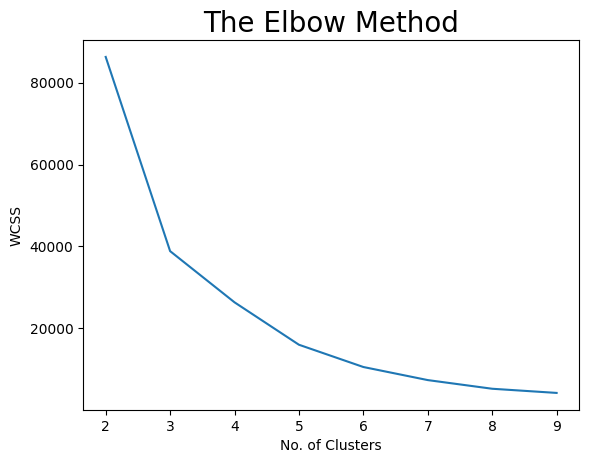

In [55]:
# Visualisasi Elbow Method untuk menentukan jumlah cluster optimal
plt.plot(range(2, 10), wcss)  # Membuat plot WCSS terhadap jumlah cluster
plt.title('The Elbow Method', fontsize=20)  # Menambahkan judul grafik
plt.xlabel('No. of Clusters')  # Label untuk sumbu X yang menunjukkan jumlah cluster
plt.ylabel('WCSS')  # Label untuk sumbu Y yang menunjukkan Within-Cluster Sum of Squares (WCSS)
plt.show()  # Menampilkan plot


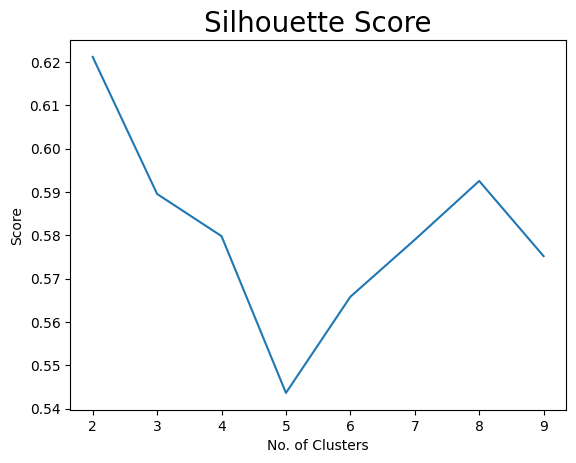

In [56]:
# Visualisasi Silhouette Score untuk menentukan jumlah cluster optimal
plt.plot(range(2, 10), scores)  # Membuat plot Silhouette Score terhadap jumlah cluster
plt.title('Silhouette Score', fontsize=20)  # Menambahkan judul grafik
plt.xlabel('No. of Clusters')  # Label untuk sumbu X yang menunjukkan jumlah cluster
plt.ylabel('Score')  # Label untuk sumbu Y yang menunjukkan nilai Silhouette Score
plt.show()  # Menampilkan plot


In [57]:
# Dari hasil Elbow Method dan Silhouette Score, kita memilih jumlah cluster K = 3
kmeansmodel = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)  # Membuat model K-Means dengan 3 cluster
y_kmeans = kmeansmodel.fit_predict(df_train)  # Melatih model dan mendapatkan label cluster untuk setiap data


In [58]:
# Membuat scatter plot 3D untuk setiap cluster dengan Plotly
trace1 = go.Scatter3d(
    x=df_train[y_kmeans == 0].iloc[:, 0],  # Data Murder untuk Cluster 1
    y=df_train[y_kmeans == 0].iloc[:, 1],  # Data Assault untuk Cluster 1
    z=df_train[y_kmeans == 0].iloc[:, 2],  # Data Rape untuk Cluster 1
    mode='markers',  # Mode titik (scatter plot)
    marker=dict(size=8, color='red', opacity=0.8),  # Ukuran, warna, dan transparansi marker
    name='Cluster 1'  # Nama label di legend
)

trace2 = go.Scatter3d(
    x=df_train[y_kmeans == 1].iloc[:, 0],
    y=df_train[y_kmeans == 1].iloc[:, 1],
    z=df_train[y_kmeans == 1].iloc[:, 2],
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.8),
    name='Cluster 2'
)

trace3 = go.Scatter3d(
    x=df_train[y_kmeans == 2].iloc[:, 0],
    y=df_train[y_kmeans == 2].iloc[:, 1],
    z=df_train[y_kmeans == 2].iloc[:, 2],
    mode='markers',
    marker=dict(size=8, color='green', opacity=0.8),
    name='Cluster 3'
)

# Scatter plot untuk menampilkan centroid dari K-Means
centroids = go.Scatter3d(
    x=kmeansmodel.cluster_centers_[:, 0],  # Koordinat Murder untuk centroid
    y=kmeansmodel.cluster_centers_[:, 1],  # Koordinat Assault untuk centroid
    z=kmeansmodel.cluster_centers_[:, 2],  # Koordinat Rape untuk centroid
    mode='markers',  # Mode titik
    marker=dict(size=12, color='black', symbol='diamond', opacity=1),  # Ukuran dan warna centroid
    name='Centroids'  # Label di legend
)

# Membuat layout
layout = go.Layout(
    title='Hasil KMeans Clustering',  # Judul grafik
    scene=dict(
        xaxis_title='Murder',  # Label sumbu X
        yaxis_title='Assault',  # Label sumbu Y
        zaxis_title='Rape'  # Label sumbu Z
    ),
    showlegend=True  # Menampilkan legend
)

# Menggabungkan semua scatter plot ke dalam satu figure
fig = go.Figure(data=[trace1, trace2, trace3, centroids], layout=layout)

# Menampilkan plot interaktif
fig.show()


hierarki

In [59]:
from sklearn.cluster import AgglomerativeClustering

linkage_col = ['ward', 'complete', 'average', 'single']  # Metode linkage yang diuji
scores_all = [[] for _ in range(len(linkage_col))]  # List untuk menyimpan skor Silhouette

for j in range(len(linkage_col)):  # Loop untuk setiap metode linkage
    print('Linkage: ', linkage_col[j])  # Cetak metode linkage yang sedang diuji
    scores = []  # List untuk menyimpan Silhouette Score per jumlah cluster

    for i in range(2, 10):  # Loop untuk jumlah cluster dari 2 hingga 9
        AC = AgglomerativeClustering(n_clusters=i, linkage=linkage_col[j])  # Inisialisasi model
        AC.fit(df_train)  # Melatih model dengan dataset df_train

        labels = AC.labels_  # Mendapatkan label cluster untuk setiap data
        silhouette_avg = silhouette_score(df_train, labels)  # Menghitung Silhouette Score
        scores.append(silhouette_avg)  # Simpan skor ke dalam list

        print('Silhouette Score untuk n_clusters = ' + str(i) + ' adalah ' + str(silhouette_avg))

    print("\n##########################\n")  # Pemisah antar metode linkage
    scores_all[j] = scores  # Menyimpan semua skor untuk metode linkage saat ini


Linkage:  ward
Silhouette Score untuk n_clusters = 2 adalah 0.6040964177705989
Silhouette Score untuk n_clusters = 3 adalah 0.5895248108092538
Silhouette Score untuk n_clusters = 4 adalah 0.5828732611691854
Silhouette Score untuk n_clusters = 5 adalah 0.5283234763434435
Silhouette Score untuk n_clusters = 6 adalah 0.5553000408039971
Silhouette Score untuk n_clusters = 7 adalah 0.5708058251189775
Silhouette Score untuk n_clusters = 8 adalah 0.5851779294779325
Silhouette Score untuk n_clusters = 9 adalah 0.5665640070151631

##########################

Linkage:  complete
Silhouette Score untuk n_clusters = 2 adalah 0.6040964177705989
Silhouette Score untuk n_clusters = 3 adalah 0.5351492250069237
Silhouette Score untuk n_clusters = 4 adalah 0.5090824762589399
Silhouette Score untuk n_clusters = 5 adalah 0.5104901960361988
Silhouette Score untuk n_clusters = 6 adalah 0.5095502083536323
Silhouette Score untuk n_clusters = 7 adalah 0.5708058251189775
Silhouette Score untuk n_clusters = 8 ada

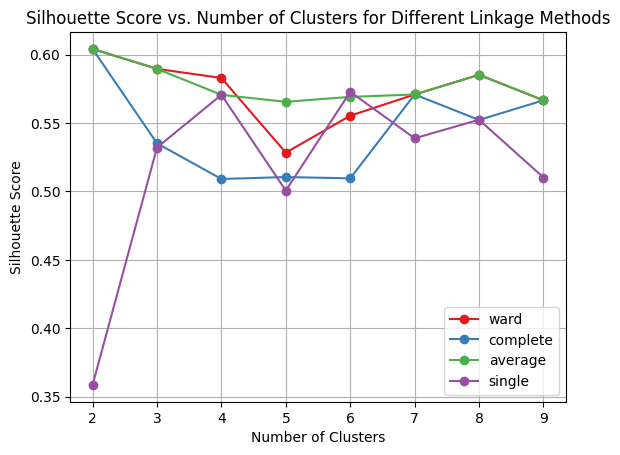

In [60]:
colors = sns.color_palette("Set1", len(linkage_col))  # Membuat palet warna berdasarkan jumlah metode linkage

for j in range(len(linkage_col)):  # Loop untuk setiap metode linkage
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])
    # Memplot Silhouette Score untuk setiap jumlah cluster (2-9)
    # Menggunakan warna berbeda untuk setiap metode linkage

plt.xlabel('Number of Clusters')  # Label sumbu X
plt.ylabel('Silhouette Score')  # Label sumbu Y
plt.title('Silhouette Score vs. Number of Clusters for Different Linkage Methods')  # Judul grafik
plt.legend()  # Menampilkan legenda untuk membedakan metode linkage
plt.grid(True)  # Menambahkan grid agar lebih mudah dibaca
plt.show()  # Menampilkan grafik


In [61]:
banyak_cluster = 3  # Menentukan jumlah cluster
AC = AgglomerativeClustering(n_clusters=banyak_cluster, linkage='average')  # Inisialisasi model dengan average linkage
labels = AC.fit_predict(df_train)  # Melakukan clustering dan mendapatkan label cluster

df_train_with_labels = np.column_stack((df_train, labels))  # Menggabungkan data dengan label cluster

centroids = []  # Menyimpan koordinat centroid dari tiap cluster
for cluster_label in range(banyak_cluster):
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]  # Memfilter data berdasarkan cluster
    cluster_centroid = np.mean(cluster_data[:, :-1], axis=0)  # Menghitung rata-rata setiap kolom (Murder, Assault, Rape)
    centroids.append(cluster_centroid)
centroids = np.array(centroids)  # Mengubah centroid menjadi array NumPy

traces = []  # Menyimpan trace untuk scatter plot setiap cluster
colors = ['red', 'blue', 'green']  # Warna untuk setiap cluster

for cluster_label in range(banyak_cluster):
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]  # Memfilter data tiap cluster
    trace = go.Scatter3d(
        x=cluster_data[:, 0],  # Murder
        y=cluster_data[:, 1],  # Assault
        z=cluster_data[:, 2],  # Rape
        mode='markers',
        marker=dict(size=8, color=colors[cluster_label], opacity=0.8),
        name=f'Cluster {cluster_label + 1}'
    )
    traces.append(trace)  # Menambahkan trace ke list

centroid_trace = go.Scatter3d(
    x=centroids[:, 0],  # Koordinat X centroid (Murder)
    y=centroids[:, 1],  # Koordinat Y centroid (Assault)
    z=centroids[:, 2],  # Koordinat Z centroid (Rape)
    mode='markers',
    marker=dict(size=12, color='black', symbol='diamond', opacity=1),
    name='Centroids'
)
traces.append(centroid_trace)  # Menambahkan centroid ke dalam plot

layout = go.Layout(
    title='Hasil Agglomerative Clustering 3D',
    scene=dict(
        xaxis_title='Murder',
        yaxis_title='Assault',
        zaxis_title='Rape'
    ),
    showlegend=True
)

fig = go.Figure(data=traces, layout=layout)
fig.show()


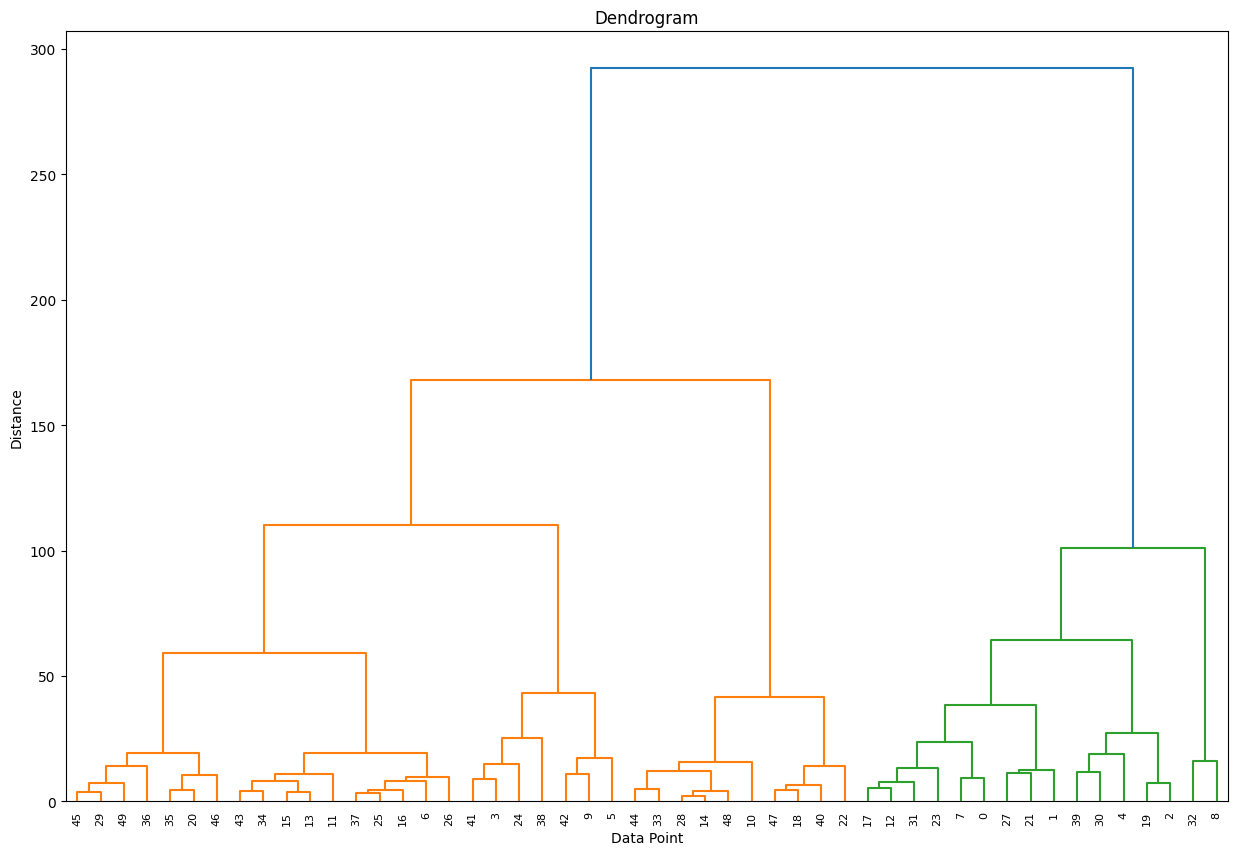

In [62]:
import scipy.cluster.hierarchy as sch  # Mengimpor library untuk hierarchical clustering

linked = sch.linkage(df_train, 'complete')  # Menghitung linkage dengan metode "complete"

plt.figure(figsize=(15, 10))  # Menentukan ukuran plot
dendrogram = sch.dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.axhline(y=1500, color='black', linestyle='--')  # Garis horizontal untuk menunjukkan batas cluster
plt.show()


In [63]:
from sklearn.cluster import DBSCAN  # Import library DBSCAN

epsilon = np.arange(0.1, 6, 0.1)  # Range nilai eps (radius maksimal untuk tetangga)
min_samples = range(1, 26)  # Range nilai min_samples (jumlah minimal tetangga)

sil_avg = []  # Menyimpan nilai Silhouette Score
max_value = (0, 0, 0, -1)  # Inisialisasi nilai maksimal dengan nilai negatif silhouette score

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(df_train)  # Membuat model DBSCAN

        labels = db.labels_  # Mendapatkan label hasil clustering
        unique_labels = set(labels)  # Mendapatkan jumlah cluster unik
        print(f"epsilon={epsilon[i]}, min_samples={min_samples[j]}, unique_labels={unique_labels}")

        # Pastikan jumlah cluster valid untuk silhouette score
        if 1 < len(unique_labels) < len(df_train):
            silhouette_avg = silhouette_score(df_train, labels)
            sil_avg.append(silhouette_avg)

            if silhouette_avg > max_value[3]:  # Menyimpan parameter terbaik
                max_value = (epsilon[i], min_samples[j], len(unique_labels), silhouette_avg)

print("\nBest parameters found:")
print("epsilon =", max_value[0])
print("min_samples =", max_value[1])
print("number of clusters =", max_value[2])
print("average silhouette score = %.4f" % max_value[3])


epsilon=0.1, min_samples=1, unique_labels={np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49)}
epsilon=0.1, min_samples=2, unique_labels={np.int64(-1)}
epsilon=0.1, min_samples=3, unique_labels={np.int64(-1)}
epsilon=0.1, min_samples=4, unique_labels={np.int64(-1)}
epsilon=0.1, min_samples=5, unique_labels={np.int64(-1)}
epsilon=0.1, min_samples=6, unique_labe

In [64]:
best_epsilon = max_value[0]  # Menggunakan nilai epsilon terbaik dari hasil pencarian sebelumnya
best_min_samples = max_value[1]  # Menggunakan nilai min_samples terbaik

db = DBSCAN(eps=best_epsilon, min_samples=best_min_samples, metric='euclidean')  # Membuat model DBSCAN dengan parameter terbaik
db.fit(df_train)  # Melatih model DBSCAN dengan data
best_labels = db.labels_  # Mendapatkan label hasil clustering

unique_labels = np.unique(best_labels)  # Mengambil daftar label unik dari hasil clustering
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'yellow']  # Warna untuk tiap cluster
cluster_colors = [colors[label % len(colors)] if label != -1 else 'black' for label in best_labels]  # Warna hitam untuk outlier

# Membuat scatter plot 3D menggunakan plotly
trace = go.Scatter3d(
    x=df_train.iloc[:, 0],  # Sumbu x menggunakan kolom pertama (Murder)
    y=df_train.iloc[:, 1],  # Sumbu y menggunakan kolom kedua (Assault)
    z=df_train.iloc[:, 2],  # Sumbu z menggunakan kolom ketiga (Rape)
    mode='markers',
    marker=dict(size=8, color=cluster_colors, opacity=0.8),  # Ukuran dan warna titik berdasarkan cluster
    text=[f'Cluster {label}' if label != -1 else 'Outlier' for label in best_labels],  # Label untuk setiap titik
    name='Data Points'
)

# Mengatur layout grafik
layout = go.Layout(
    title=f'Hasil DBSCAN Clustering (epsilon={best_epsilon}, min_samples={best_min_samples})',  # Judul grafik
    scene=dict(
        xaxis_title='Murder',
        yaxis_title='Assault',
        zaxis_title='Rape'
    ),
    showlegend=False  # Menonaktifkan legend karena label ditampilkan langsung di titik
)

# Menggabungkan data dan layout untuk membuat grafik
fig = go.Figure(data=[trace], layout=layout)

# Menampilkan plot interaktif
fig.show()


In [73]:
# Misalkan kita ingin mengetahui sebaran pengguna vision Hydro

df_total = df[df['crime$cluster'] == 4] #datanya agak tricky
df_total

,State,crime$cluster,Murder,Assault,UrbanPop,Rape
0,Alabama,4,13.2,236,58,21.2
1,Alaska,4,10.0,263,48,44.5
2,Arizona,4,8.1,294,80,31.0
4,California,4,9.0,276,91,40.6
7,Delaware,4,5.9,238,72,15.8
8,Florida,4,15.4,335,80,31.9
12,Illinois,4,10.4,249,83,24.0
17,Louisiana,4,15.4,249,66,22.2
19,Maryland,4,11.3,300,67,27.8
21,Michigan,4,12.1,255,74,35.1


In [74]:
df_total_train = df_train.loc[df_total.index]
df_total_train

,Murder,Assault,Rape
0,13.2,236,21.2
1,10.0,263,44.5
2,8.1,294,31.0
4,9.0,276,40.6
7,5.9,238,15.8
8,15.4,335,31.9
12,10.4,249,24.0
17,15.4,249,22.2
19,11.3,300,27.8
21,12.1,255,35.1


In [76]:
# Mengambil nama state dari df_total untuk digunakan sebagai label hover pada plot
nama_chara = df_total['State']

# Membuat scatter plot 3D untuk Cluster 1
trace1 = go.Scatter3d(
    x=df_total_train[y_kmeans[df_total_train.index] == 0].iloc[:, 0],  # Sumbu X berdasarkan data cluster 1
    y=df_total_train[y_kmeans[df_total_train.index] == 0].iloc[:, 1],  # Sumbu Y berdasarkan data cluster 1
    z=df_total_train[y_kmeans[df_total_train.index] == 0].iloc[:, 2],  # Sumbu Z berdasarkan data cluster 1
    mode='markers',
    marker=dict(size=8, color='red', opacity=0.8),  # Warna merah untuk cluster 1
    text=nama_chara[y_kmeans[df_total_train.index] == 0],  # Menampilkan nama state saat hover
    hoverinfo='text',
    name='Cluster 1'
)

# Membuat scatter plot 3D untuk Cluster 2
trace2 = go.Scatter3d(
    x=df_total_train[y_kmeans[df_total_train.index] == 1].iloc[:, 0],  # Sumbu X berdasarkan data cluster 2
    y=df_total_train[y_kmeans[df_total_train.index] == 1].iloc[:, 1],  # Sumbu Y berdasarkan data cluster 2
    z=df_total_train[y_kmeans[df_total_train.index] == 1].iloc[:, 2],  # Sumbu Z berdasarkan data cluster 2
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.8),  # Warna biru untuk cluster 2
    text=nama_chara[y_kmeans[df_total_train.index] == 1],  # Menampilkan nama state saat hover
    hoverinfo='text',
    name='Cluster 2'
)

# Membuat scatter plot 3D untuk Cluster 3
trace3 = go.Scatter3d(
    x=df_total_train[y_kmeans[df_total_train.index] == 2].iloc[:, 0],  # Sumbu X berdasarkan data cluster 3
    y=df_total_train[y_kmeans[df_total_train.index] == 2].iloc[:, 1],  # Sumbu Y berdasarkan data cluster 3
    z=df_total_train[y_kmeans[df_total_train.index] == 2].iloc[:, 2],  # Sumbu Z berdasarkan data cluster 3
    mode='markers',
    marker=dict(size=8, color='green', opacity=0.8),  # Warna hijau untuk cluster 3
    text=nama_chara[y_kmeans[df_total_train.index] == 2],  # Menampilkan nama state saat hover
    hoverinfo='text',
    name='Cluster 3'
)

# Scatter plot untuk menampilkan centroid dari K-Means
centroids = go.Scatter3d(
    x=kmeansmodel.cluster_centers_[:, 0],  # Sumbu X untuk centroid
    y=kmeansmodel.cluster_centers_[:, 1],  # Sumbu Y untuk centroid
    z=kmeansmodel.cluster_centers_[:, 2],  # Sumbu Z untuk centroid
    mode='markers',
    marker=dict(size=12, color='black', symbol='diamond', opacity=1),  # Centroid berwarna hitam berbentuk diamond
    name='Centroids'
)

# Membuat layout untuk visualisasi plot
layout = go.Layout(
    title='Hasil KMeans Clustering',  # Judul grafik
    scene=dict(
        xaxis_title='HP',  # Label untuk sumbu X
        yaxis_title='ATK',  # Label untuk sumbu Y
        zaxis_title='DEF'   # Label untuk sumbu Z
    ),
    showlegend=True  # Menampilkan legenda untuk tiap cluster
)

# Menggabungkan semua trace (cluster dan centroid) ke dalam satu figure
fig = go.Figure(data=[trace1, trace2, trace3, centroids], layout=layout)

# Menampilkan plot interaktif
fig.show()


PCA

In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standarisasi data sebelum PCA
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_train)  # Menstandarisasi data agar memiliki mean = 0 dan variance = 1

# Menggunakan PCA dengan 2 komponen utama
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_train_scaled)  # Melakukan PCA pada data yang telah distandarisasi

# Standarisasi kembali hasil PCA agar memiliki skala yang seragam
pca_data = scaler.fit_transform(pca_data)

# Mengonversi hasil PCA menjadi DataFrame untuk kemudahan analisis
pca_data = pd.DataFrame(pca_data, columns=["PCA_1", "PCA_2"])

# Menampilkan rasio varians yang dijelaskan oleh masing-masing komponen utama
print("PCA explained variance ratio:\n", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))


PCA explained variance ratio:
 0.786 0.153


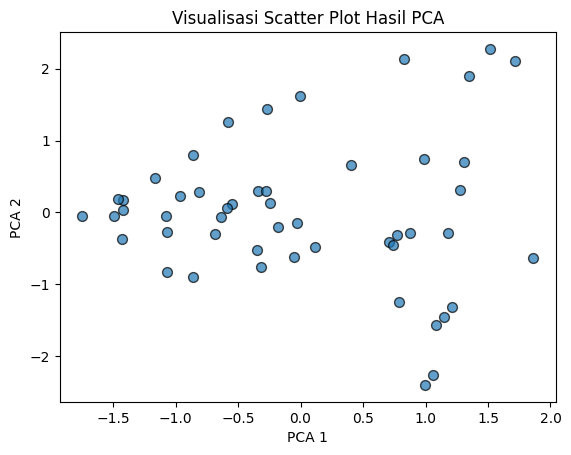

In [80]:
# Membuat scatter plot hasil PCA untuk visualisasi dalam 2D
plt.scatter(pca_data["PCA_1"], pca_data["PCA_2"], s=50, alpha=0.7, edgecolors='k')  # Menambahkan transparansi dan garis tepi untuk visibilitas lebih baik

# Menambahkan label sumbu dan judul
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Scatter Plot Hasil PCA')

# Menampilkan plot
plt.show()
